# fraud sistem 
- Step -1: Load the data to understand it. Data understanding is critical since we will select the subset of features to carry out model training, and it includes types of data and its patterns.

- Step -2: Exploratory Data Analysis Study histogram to compare each variable’s data distribution pattern and skewness of the data. Make necessary data adjustments to avoid any problems while we train the model.

- Step -3: Class imbalance Study whether data is highly imbalanced between the fraudulent and non-fraudulent. We have learned four techniques to balance the data using various methods: Under-sampling, oversampling, 2 SMOTE (Synthetic Minority Over Sample Technique), and ADASYN (Adaptive Synthetic). We will use ADASYN techniques to lower the bias introduced by class imbalance and adaptively shift the classification decision boundary towards complex examples.

- Step -4: Data modeling and model selection We will use two classification models (RadomForest and XGBoost) for the current study. For XGBoost, we will identify the number of trees based on the accuracy levels. We will not use KNN since the data set are more than 10K (computation time is increased if data sets are more than 10K). The decision tree gives an interpretation of the flow chart. Hence, it is widely used, but we do not know when to stop building trees and tend to overfit. We will use parameters such as confusion matrix, accuracy, precision, recall, and F-score, threshold dependent. Since data is imbalanced, we will also perform a deep dive into the ROC curve data to identify the threshold value (above the threshold value is fraudulent and below the threshold is not dishonest). We will calculate the F1 score, Precision, and Recall.

- Step -5: Hyperparameter Tunings the model At this time, we will have the best understanding of the type of data we have and the kind of model we were going to build. After model building, our next step will be either hyperparameter tunings (CV or Cross-validation) or grid-search cross-validation or K-Fold or stratified K-Fold, or train validation and test split. This step is essential to improve accuracy, AUC, and lower misclassification error.

- Step -6: Model evaluation Evaluate the model based on AUC -ROC score, through which we will define the threshold value. We will calculate the F1 Score, Precision, and Recall. This will be key for banks to represent the business strategy to bring down the Fraud.

In [2]:
# data frame 
import pandas as pd 
import numpy as np 

# step 1

In [3]:
df = pd.read_csv("c:\\Users\\margaritha\\Documents\\Purwadhika\\creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- EX Lib

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as Pyplot

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import shapiro
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve, StratifiedShuffleSplit,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification


from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn import over_sampling

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# step 2 

# check missing value 

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# done without missing value 

In [9]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

# 0 = non fraud / 1 = fraud data from class 

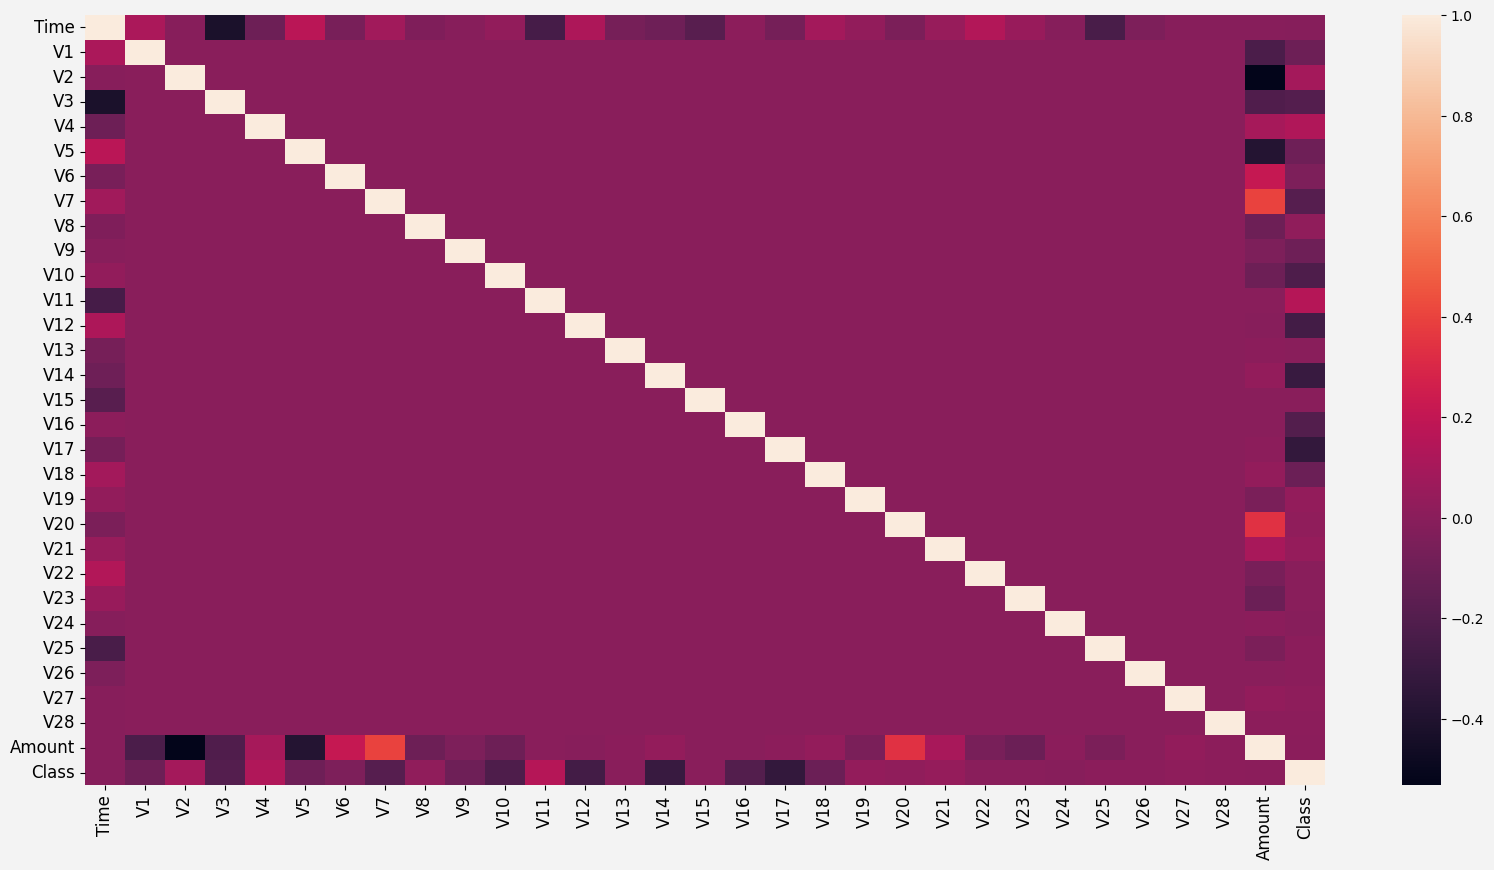

In [12]:
creditcard_corr=df.corr()
fig = plt.figure(figsize=(20,10))
fig.set_facecolor("#F3F3F3")
ax=sns.heatmap(creditcard_corr)
plt.tick_params(labelsize=12)
plt.show()

# V1 - V 28 check korelasi terhadap amount 
- terlihat v2 dan v5 memiliki warna ungu pekat yang mengindikasi bahwa ikatan nya negatif 



Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12


C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\4167480805.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(df.loc[(df["Class"] == 0),'V1'] , color='b',shade=True,label='Non Fraudulent')
C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\4167480805.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(df.loc[(df['Class'] == 1),'V1'] , color='orange',shade=True, label='Fraudulent')
C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\4167480805.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(df.loc[(df["Class"] == 0),'V2'] , color='b',shade=True,label='Non Fraudulent')
C:\Users\margaritha\AppData\

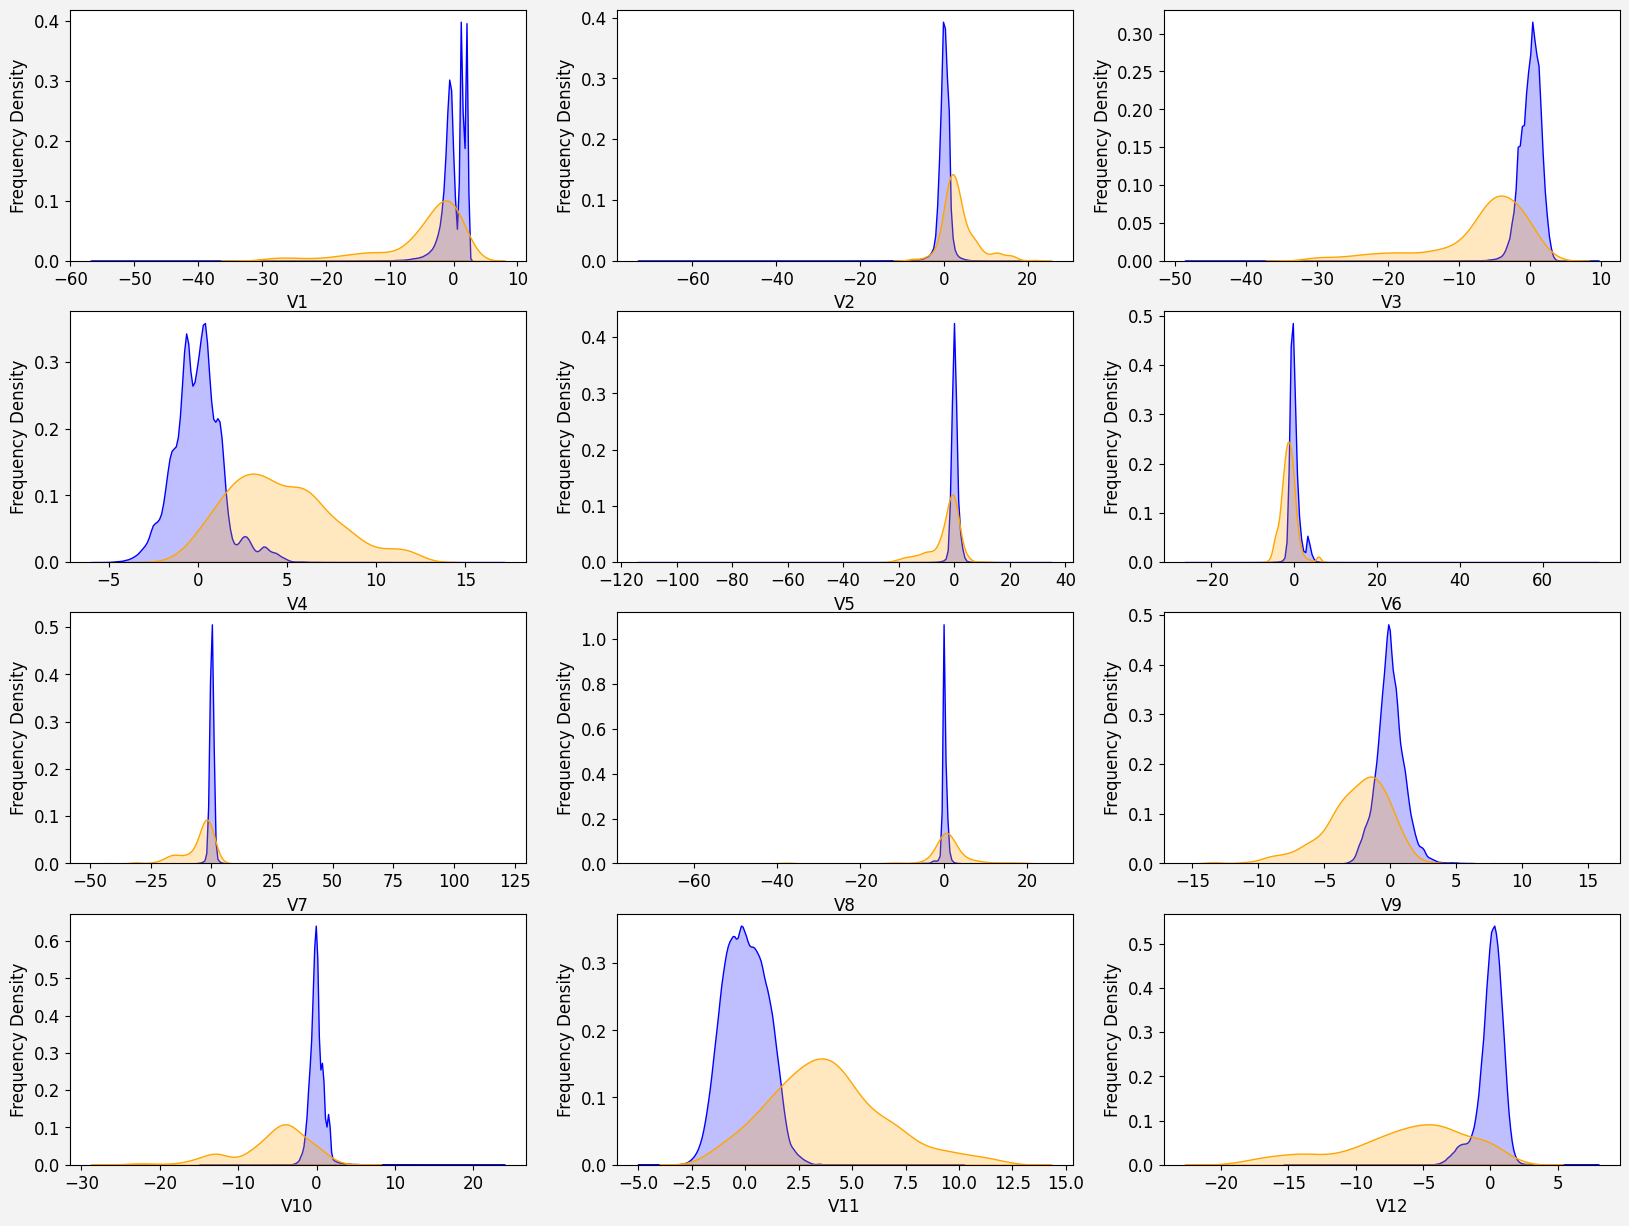

In [13]:
print(); 
print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12"); 
fig = plt.figure(figsize=(20,15))
fig.set_facecolor("#F3F3F3")

plt.subplot(431)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V1'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V1'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V1", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(432)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V2'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V2'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V2", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(433)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V3'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V3'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V3", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(434)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V4'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V4'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V4", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(435)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V5'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V5'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V5", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(436)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V6'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V6'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V6", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(437)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V7'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V7'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V7", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(438)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V8'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V8'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V8", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(439)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V9'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V9'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V9", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,10)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V10'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V10'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V10", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,11)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V11'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V11'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V11", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,12)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V12'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V12'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V12", fontsize=12)
plt.tick_params(labelsize=12)

plt.show(); 


Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12


C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\54850074.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(df.loc[(df["Class"] == 0),'V1'] , color='b',shade=True,label='Non Fraudulent')
C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\54850074.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(df.loc[(df['Class'] == 1),'V1'] , color='orange',shade=True, label='Fraudulent')
C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\54850074.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(df.loc[(df["Class"] == 0),'V2'] , color='b',shade=True,label='Non Fraudulent')
C:\Users\margaritha\AppData\Local\

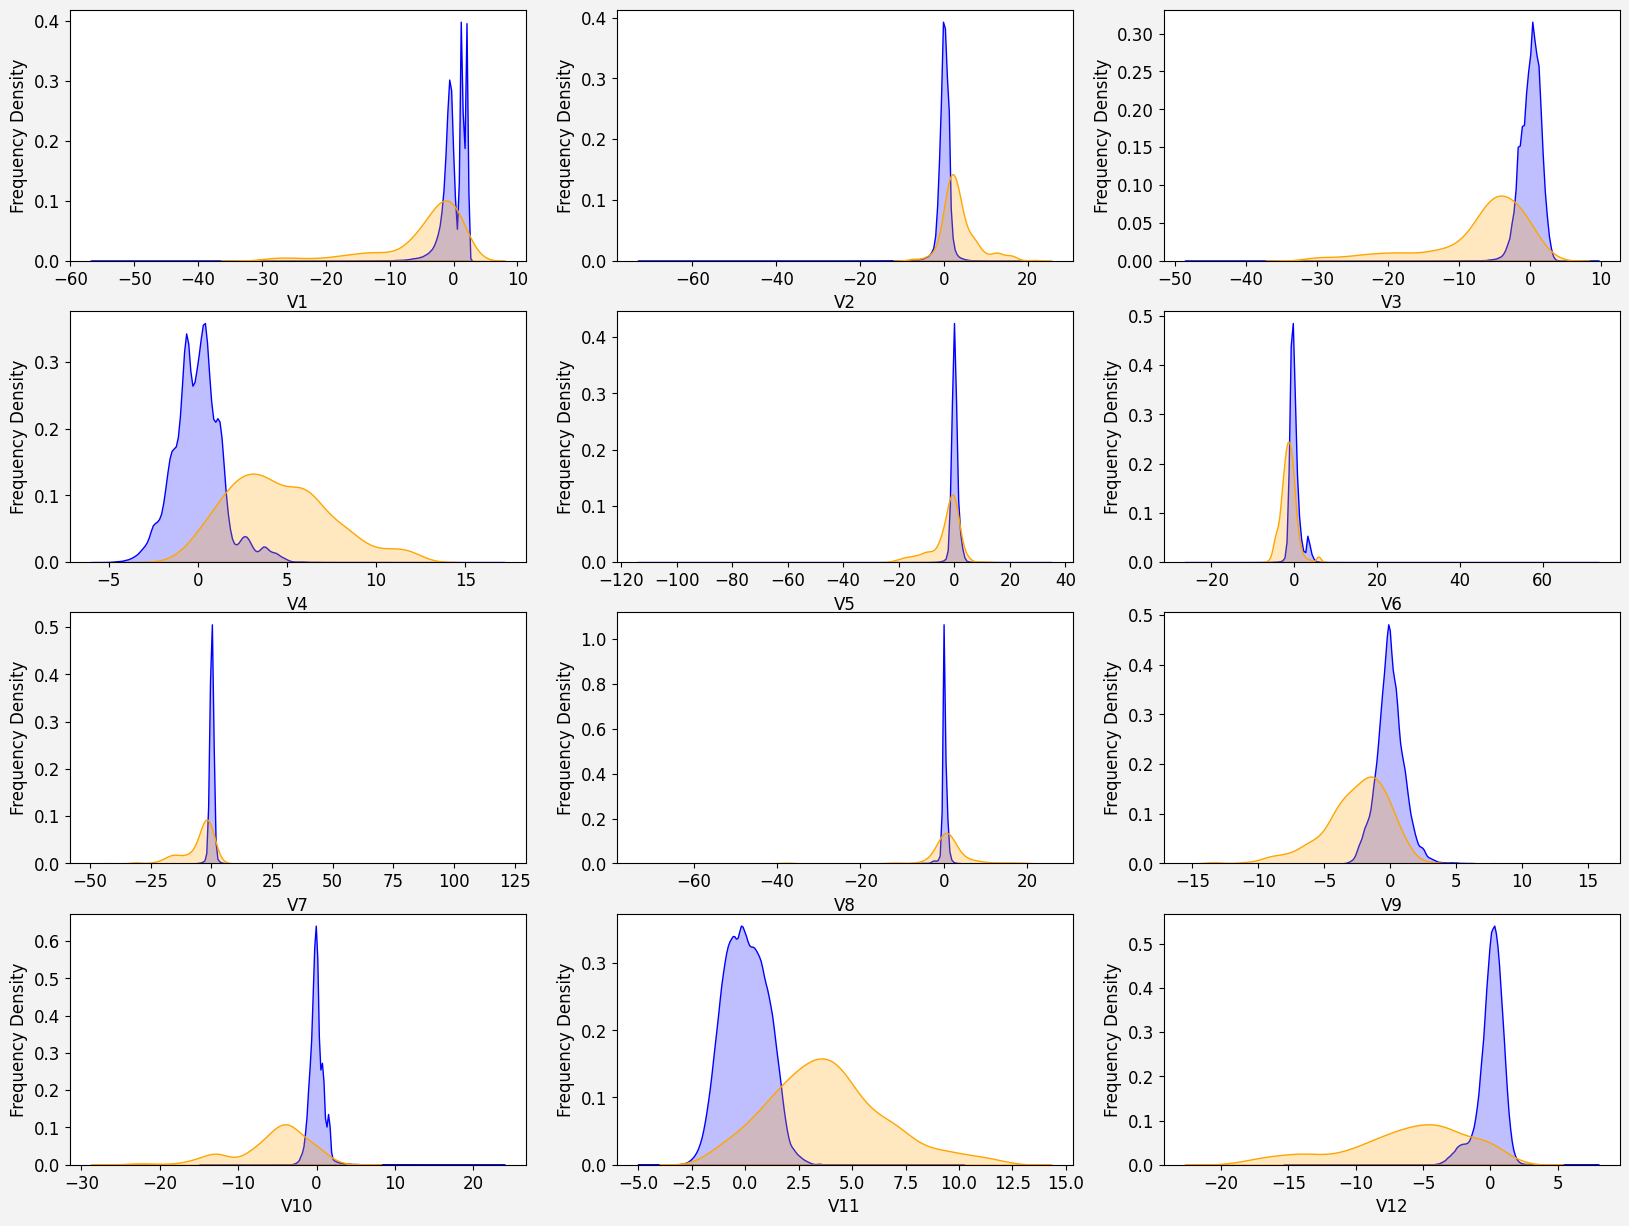

In [14]:
print(); ()
print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12"); 
fig = plt.figure(figsize=(20,15))
fig.set_facecolor("#F3F3F3")

plt.subplot(431)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V1'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V1'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V1", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(432)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V2'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V2'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V2", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(433)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V3'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V3'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V3", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(434)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V4'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V4'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V4", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(435)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V5'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V5'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V5", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(436)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V6'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V6'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V6", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(437)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V7'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V7'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V7", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(438)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V8'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V8'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V8", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(439)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V9'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V9'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V9", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,10)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V10'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V10'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V10", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,11)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V11'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V11'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V11", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,12)
g=sns.kdeplot(df.loc[(df["Class"] == 0),'V12'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(df.loc[(df['Class'] == 1),'V12'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V12", fontsize=12)
plt.tick_params(labelsize=12)

plt.show();

# y = fraud  , X = non - fraud 

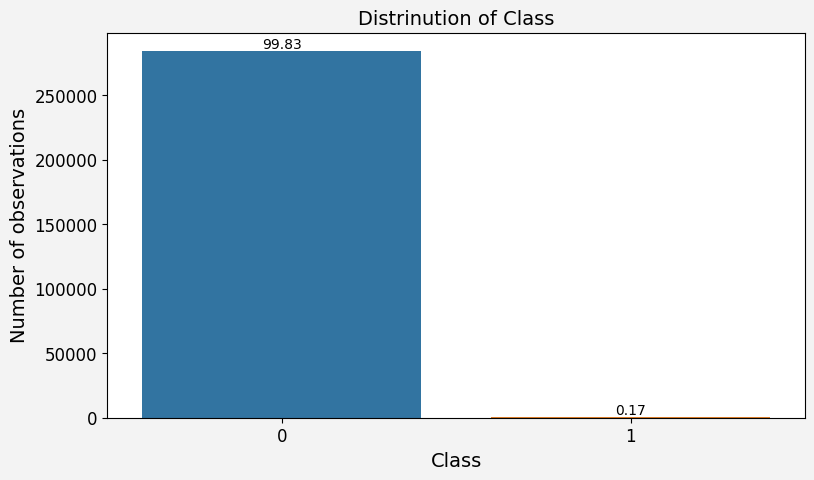

In [15]:
fig = plt.figure(figsize=(9,5))
fig.set_facecolor("#F3F3F3")
total = float(len(df)) 
ax = sns.countplot(x="Class",  data=df)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)
plt.title('Distrinution of Class', fontsize =14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(100*height/total), 
            ha="center",va='bottom')
ax.grid(False)
plt.tick_params(labelsize=12)
plt.show();

# fraud case 0.17 % its was concern for fraud case system

In [18]:
df['Time'] =df['Time']/3600

In [19]:
def replace_data_to_binary(x,y):
    df.Class.replace(x,y, inplace=True)
  
    
replace_data_to_binary(0, 'Non Fraudulent')
replace_data_to_binary(1, 'Fraudulent')

In [24]:
print("Amount details of  transaction :")
print(df[df["Class"] == "Fraudulent"].Amount.describe())

print('\n')

print("Amount details of non-fraudulent transaction :")
print(df[df["Class"] == "Non Fraudulent"].Amount.describe())

Amount details of  transaction :
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Amount details of non-fraudulent transaction :
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


# total uang transaksi fraud 2125 

Evaluate the time vs. amount transaction between fraudulent and non-fraudulent


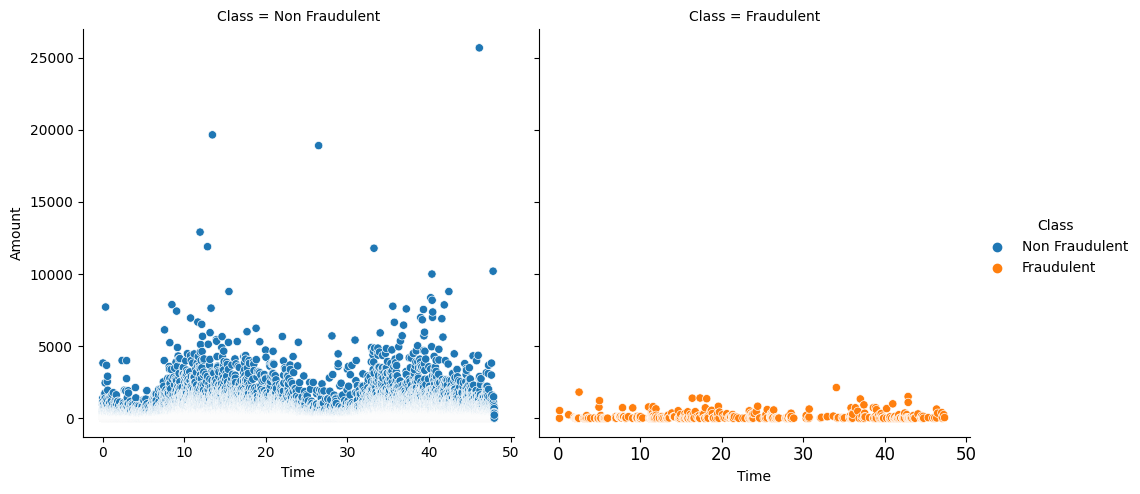

In [23]:
print("Evaluate the time vs. amount transaction between fraudulent and non-fraudulent");
ax=sns.relplot(x="Time", y="Amount",
                 col="Class", hue="Class",
                 kind="scatter", data=df)
plt.tick_params(labelsize=12)
plt.show(); 

# Few insights on the visualization above reveal the following:

- The plot indicates that the fraud amounts were less than approx 2.2k.
- Fraud pattern indicates that the number of data points is observed between 14 to 20 hours on both days.
- We can see a two-picks pattern in time due tonight

In [ ]:
df[df["Class"] == "Non Fraudulent"]

In [30]:
print (" Non fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:")
print("")
a = df[df["Class"] == "Non Fraudulent"].mean(axis = 0, skipna = True)
b = df[df["Class"] == "Non Fraudulent"].var(axis = 0, skipna = True)
c = df[df["Class"] == "Non Fraudulent"].skew(axis = 0, skipna = True)
d = df[df["Class"] == "Non Fraudulent"].kurtosis(axis = 0, skipna = True)

a.index = b.index
a.index = c.index
a.index = d.index

data_Non_Fraudulent = pd.concat([a, b, c, d] ,axis = 1)
data_Non_Fraudulent.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Non_Fraudulent=data_Non_Fraudulent.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Non_Fraudulent);

 Non fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:



C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\382266227.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a = df[df["Class"] == "Non Fraudulent"].mean(axis = 0, skipna = True)
C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\382266227.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  b = df[df["Class"] == "Non Fraudulent"].var(axis = 0, skipna = True)
C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\382266227.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  

   Variables       Mean           Var   Skewness    kurtosis
0       Time  26.343945    173.976216  -0.036015   -1.293597
1         V1   0.008258      3.724182  -3.130188   31.065568
2         V2  -0.006271      2.676974  -4.887166   98.406211
3         V3   0.012171      2.129933  -1.453676   14.545345
4         V4  -0.007860      1.958134   0.581137    2.095716
5         V5   0.005453      1.841318  -2.213903  217.852170
6         V6   0.002419      1.768669   1.842604   42.987534
7         V7   0.009637      1.389598   4.747800  452.920870
8         V8  -0.000987      1.348579  -8.395492  209.772662
9         V9   0.004467      1.186731   0.665635    3.196847
10       V10   0.009824      1.090361   2.422278   21.961970
11       V11  -0.006576      1.006233   0.145537    0.035641
12       V12   0.010832      0.894801  -1.256301    5.300894
13       V13   0.000189      0.990157   0.065582    0.196578
14       V14   0.012064      0.804621  -0.703857    7.719480
15       V15   0.000161 

C:\Users\margaritha\AppData\Local\Temp\ipykernel_10784\382266227.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d = df[df["Class"] == "Non Fraudulent"].kurtosis(axis = 0, skipna = True)


Variables       Mean           Var   Skewness    kurtosis
-       Time  26.343945    173.976216  -0.036015   -1.293597
-         V1   0.008258      3.724182  -3.130188   31.065568
-         V2  -0.006271      2.676974  -4.887166   98.406211
-         V3   0.012171      2.129933  -1.453676   14.545345
-         V4  -0.007860      1.958134   0.581137    2.095716
-         V5   0.005453      1.841318  -2.213903  217.852170
-         V6   0.002419      1.768669   1.842604   42.987534
-         V7   0.009637      1.389598   4.747800  452.920870
-         V8  -0.000987      1.348579  -8.395492  209.772662
-         V9   0.004467      1.186731   0.665635    3.196847
-         V10   0.009824      1.090361   2.422278   21.961970
-         V11  -0.006576      1.006233   0.145537    0.035641
-         V12   0.010832      0.894801  -1.256301    5.300894
-         V13   0.000189      0.990157   0.065582    0.196578
-         V14   0.012064      0.804621  -0.703857    7.719480
-         V15   0.000161      0.837335  -0.307659    0.282770
-         V16   0.007164      0.713639  -0.439523    2.847237
-         V17   0.011535      0.561685   0.224528   20.055343
-         V18   0.003887      0.680491  -0.039862    0.844906
-         V19  -0.001178      0.658911   0.097484    1.696382
-         V20  -0.000644      0.591982  -2.078113  273.298796
-         V21  -0.001235      0.513721   3.009113  176.811527
-         V22  -0.000024      0.523696  -0.193030    2.252726
-         V23   0.000070      0.386313  -5.814596  444.244547
-         V24   0.000182      0.366965  -0.552864    0.619364
-         V25  -0.000072      0.271101  -0.413687    4.275121
-         V26  -0.000089      0.232556   0.576812    0.917469
-         V27  -0.000295      0.159877  -1.071248  252.535433
-         V28  -0.000131      0.108616  11.267457  940.839414
-   Amount  88.291022  62552.557157  17.003147  846.736996

- check for positive skew 

- Skewness = 0 : normally distributed. ; a zero value means that the tails on both sides of the mean balance out overall,
- Skewness > 0: more weight in the left tail of the distribution.
- Skewness < 0: more weight in the right tail of the distribution.
- For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for asymmetric distribution, but it can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

# Note: we will look into this if we require any power transformation to the data. However, they are PCA transformed (not an original one)

